<a href="https://colab.research.google.com/github/NerusuSahithi011/NLP/blob/main/lab_assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Loading pre-trained embeddings
import gensim.downloader as api

# Numerical operations
import numpy as np

# Data handling (optional but useful)
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.manifold import TSNE


WORD2VEC

In [ ]:
# Load pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

# Print vocabulary size
print("Vocabulary Size:", len(model.key_to_index))

# Display one example vector
print("Vector for 'king':\n", model['king'])
print("Vector Dimension:", len(model['king']))


[=============================---------------------] 58.6% 975.1/1662.8MB downloaded

In [ ]:
words = [
    # Animals
    "cat", "dog", "lion", "tiger", "elephant", "wolf", "monkey", "horse",

    # Cities
    "Paris", "London", "Delhi", "Mumbai", "Tokyo", "Berlin", "Rome", "New_York",

    # Royalty
    "king", "queen", "prince", "princess", "man", "woman", "boy", "girl",

    # Technology
    "computer", "laptop", "keyboard", "mouse", "internet", "software", "hardware", "AI",

    # Fruits
    "apple", "banana", "mango", "grape", "orange", "pineapple", "pear", "peach"
]


In [21]:
vectors = []

for word in words:
    if word in model:
        vectors.append(model[word])

vectors = np.array(vectors)
print("Shape of vectors:", vectors.shape)


Shape of vectors: (40, 300)


In [22]:
tsne = TSNE(n_components=2, random_state=42, perplexity=10)

reduced_vectors = tsne.fit_transform(vectors)

print("Reduced Shape:", reduced_vectors.shape)


Reduced Shape: (40, 2)


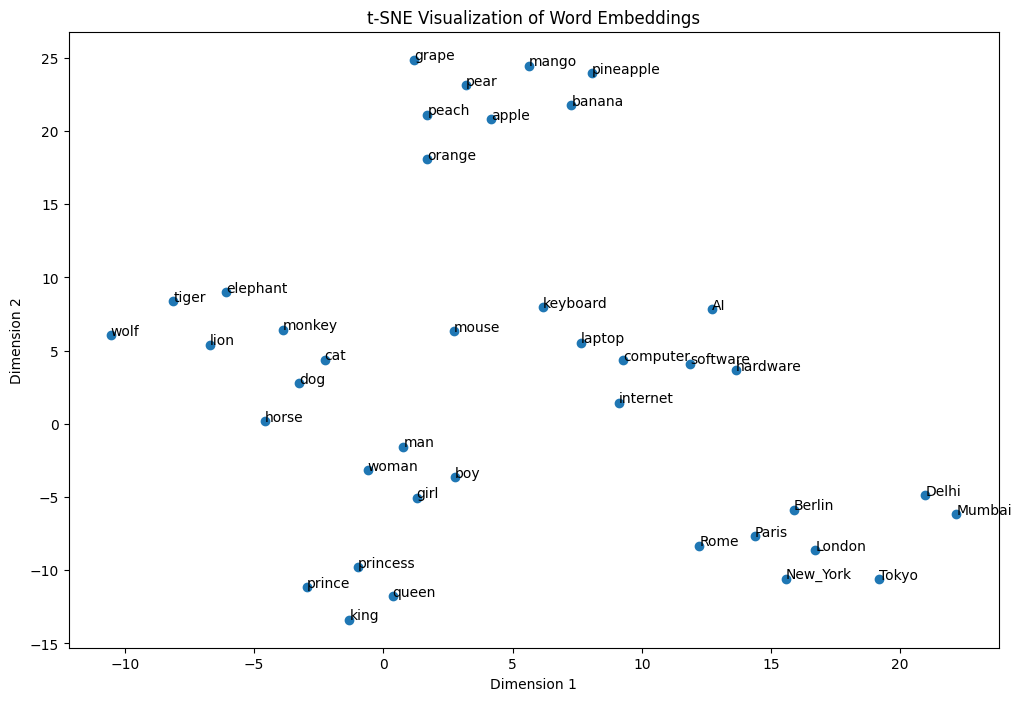

In [23]:
plt.figure(figsize=(12, 8))

x = reduced_vectors[:, 0]
y = reduced_vectors[:, 1]

plt.scatter(x, y)

for i, word in enumerate(words):
    plt.annotate(word, (x[i], y[i]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


GLOVE


In [24]:
import gensim.downloader as api

# Load GloVe (100D)
glove_model = api.load("glove-wiki-gigaword-100")

print("GloVe Vocabulary Size:", len(glove_model.key_to_index))
print("\nExample GloVe vector for 'king':")
print(glove_model['king'])

GloVe Vocabulary Size: 400000

Example GloVe vector for 'king':
[-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.7357    0.4751   -0.70487   0.056939
 -0.7132    0.089623  0.4

In [25]:
import numpy as np

words = [
    # Animals
    "cat", "dog", "lion", "tiger", "elephant", "wolf", "monkey", "horse",

    # Cities
    "Paris", "London", "Delhi", "Mumbai", "Tokyo", "Berlin", "Rome", "New_York",

    # Royalty
    "king", "queen", "prince", "princess", "man", "woman", "boy", "girl",

    # Technology
    "computer", "laptop", "keyboard", "mouse", "internet", "software", "hardware", "AI",

    # Fruits
    "apple", "banana", "mango", "grape", "orange", "pineapple", "pear", "peach"
]

glove_vectors = []
actual_glove_words = [] # Keep track of words that are actually in the model

for word in words:
    if word in glove_model:
        glove_vectors.append(glove_model[word])
        actual_glove_words.append(word) # Add word to the list if found

glove_vectors = np.array(glove_vectors)
print("Shape of GloVe vectors:", glove_vectors.shape)

Shape of GloVe vectors: (31, 100)


In [14]:
from sklearn.manifold import TSNE

glove_tsne = TSNE(n_components=2, random_state=42, perplexity=10)

reduced_glove_vectors = glove_tsne.fit_transform(glove_vectors)

print("Reduced GloVe Shape:", reduced_glove_vectors.shape)

Reduced GloVe Shape: (31, 2)


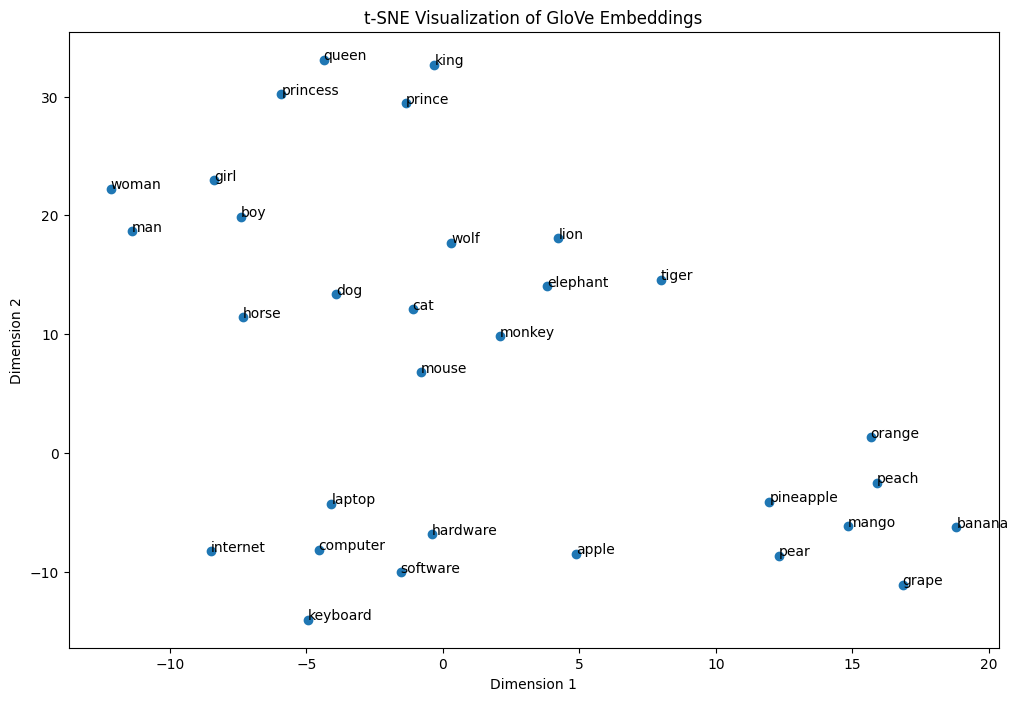

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

x_glove = reduced_glove_vectors[:, 0]
y_glove = reduced_glove_vectors[:, 1]

plt.scatter(x_glove, y_glove)

# Loop through the list of words that were actually found in the GloVe model
for i, word in enumerate(actual_glove_words):
    plt.annotate(word, (x_glove[i], y_glove[i]))

plt.title("t-SNE Visualization of GloVe Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()